In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
df = pd.read_csv("data/train_spaceship.csv")
df.head() #將資料列出觀察 #可先假設各項與結果相關性
df.info() #觀察data欄位空值狀況 & data type(是否數值化)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [2]:
#Remove the columns model will not use
df.drop(['Name','Cabin'],axis=1,inplace=True) #將name&ticket去掉，要刪掉的位置0->橫向,1->直向
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
True,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131


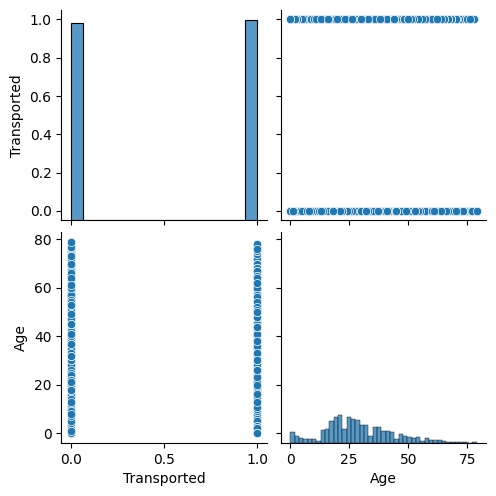

In [3]:
#視覺化觀察 #survive與否與其他欄位關聯性 #可能可先觀察到結果
sns.pairplot(df[['Transported','Age']], dropna=True) #拿survived & others 比較

#data observing #excel方式觀察各項中位數與目標
df.groupby('Transported').mean(numeric_only=True)

In [4]:
#查看空值
df.isnull().sum() #isnull->是否為空值,是為true,.sum->表現出來0為無待處理事項 剩餘唯有空值
len(df) #全部有幾筆資料

8693

In [5]:
# data observing #查看資料內容
df['PassengerId'].value_counts()
df['HomePlanet'].value_counts()
df['Destination'].value_counts()
df['Age'].value_counts()
df['RoomService'].value_counts()
df['FoodCourt'].value_counts()
df['ShoppingMall'].value_counts()
df['Spa'].value_counts()
df['VRDeck'].value_counts()
df['CryoSleep'].value_counts()
df['VIP'].value_counts()

# 查看最大值
df['HomePlanet'].value_counts().idxmax()
df['Destination'].value_counts().idxmax()
df['Age'].value_counts().idxmax()
df['RoomService'].value_counts().idxmax()
df['FoodCourt'].value_counts().idxmax()
df['ShoppingMall'].value_counts().idxmax()
df['Spa'].value_counts().idxmax()
df['VRDeck'].value_counts().idxmax()
df['CryoSleep'].value_counts().idxmax()
df['VIP'].value_counts().idxmax()

False

In [6]:
# 補空值
# 從觀察可看出超過一半乘客皆未消費因此填補最大值較不會有落差
df['HomePlanet'].fillna(df['HomePlanet'].value_counts().idxmax(),inplace=True)
df['Destination'].fillna(df['Destination'].value_counts().idxmax(),inplace=True)
df['Age'].fillna(df['Age'].value_counts().median(), inplace=True)
df['RoomService'].fillna(df['RoomService'].value_counts().idxmax(),inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].value_counts().idxmax(),inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].value_counts().idxmax(),inplace=True)
df['Spa'].fillna(df['Spa'].value_counts().idxmax(),inplace=True)
df['VRDeck'].fillna(df['VRDeck'].value_counts().idxmax(),inplace=True)
df['CryoSleep'].fillna(df['CryoSleep'].value_counts().idxmax(),inplace=True)
df['VIP'].fillna(df['VIP'].value_counts().idxmax(),inplace=True)
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [7]:
#將HomePlanet轉換爲是否爲Earth、Europa、Mars
#Destination轉換為是否為55Cancrie、PSOJ318.5-22"TRAPPIST-1e
df = pd.get_dummies(data=df, columns=['HomePlanet','Destination'])
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,True,False,False,False,True
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,True,False,False,False,False,True
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,False,False,True
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False,False,False,True
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,True,False,False,False,False,True


In [8]:
#開始機器學習
df.corr()
#Prepare training data
X = df.drop(['Transported'],axis=1)  #欲預測的目標丟掉
y = df['Transported'] #集合所有survived

In [9]:
#split to training data & testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [10]:
#using Logistic regression model
from sklearn.linear_model import LogisticRegression #分類
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [11]:
#Evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
accuracy_score(y_test, predictions)
recall_score(y_test, predictions)
precision_score(y_test, predictions)

0.7450124688279302

In [12]:
#表格化
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, predictions))
pre={"PassengerId":[df['PassengerId']],"confusion_matrix":[confusion_matrix(y_test, predictions)]}
pd.DataFrame(pre)

,PassengerId,confusion_matrix
0,0 0001_01 1 0002_01 2 0003_0...,"[[879, 409], [125, 1195]]"


導入比賽格式

In [13]:
#導入比賽格式
import joblib
joblib.dump(lr,'spacetitanic-hw.pkl',compress=3)

['spacetitanic-hw.pkl']

In [14]:
#Model Using
import joblib
model_pretrained = joblib.load('spacetitanic-hw.pkl')

import pandas as pd
#for submission
df_test = pd.read_csv("data/test_spaceship.csv")
df_test.head()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [15]:
# 使導出的結構格式與原程式碼相同
df_test.drop(['Name','Cabin'],axis=1,inplace=True)

df_test['HomePlanet'].fillna(df_test['HomePlanet'].value_counts().idxmax(),inplace=True)
df_test['Destination'].fillna(df_test['Destination'].value_counts().idxmax(),inplace=True)
df_test['Age'].fillna(df_test['Age'].value_counts().median(), inplace=True)
df_test['RoomService'].fillna(df_test['RoomService'].value_counts().idxmax(),inplace=True)
df_test['FoodCourt'].fillna(df_test['FoodCourt'].value_counts().idxmax(),inplace=True)
df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].value_counts().idxmax(),inplace=True)
df_test['Spa'].fillna(df_test['Spa'].value_counts().idxmax(),inplace=True)
df_test['VRDeck'].fillna(df_test['VRDeck'].value_counts().idxmax(),inplace=True)
df_test['CryoSleep'].fillna(df_test['CryoSleep'].value_counts().idxmax(),inplace=True)
df_test['VIP'].fillna(df_test['VIP'].value_counts().idxmax(),inplace=True)
df_test.isnull().sum()

df_test = pd.get_dummies(data=df_test, columns=['HomePlanet','Destination'])

In [16]:
#start test開始模型
predictions2 = model_pretrained.predict(df_test)
predictions2

array([ True, False,  True, ...,  True,  True,  True])

In [18]:
#Preare submit file
forSubmissionDF = pd.DataFrame(columns=['PassengerId','Transported'])
forSubmissionDF['PassengerId'] = df_test['PassengerId']
forSubmissionDF['Transported'] = predictions2
forSubmissionDF


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [19]:
#轉成csv檔
forSubmissionDF.to_csv('for_submission_spaceship-hw.csv', index=False)